In [1]:
%cd ..

import h5py
import matplotlib.pyplot as plt
import numpy as np

/data_1/renkaiwen/CS-ViT/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/data_1/renkaiwen/CS-ViT


In [2]:
prediction = h5py.File("/data_1/renkaiwen/CS-ViT/checkpoints/spatial_dexycb_swint_spenc_addpat_noti_20250521_2/eval_dexycb_spatial_full_20250522.h5")

In [6]:
gt = prediction["joint_cam_gt"][::10]
pred = prediction["joint_cam_pred"][::10]

<Figure size 640x480 with 0 Axes>

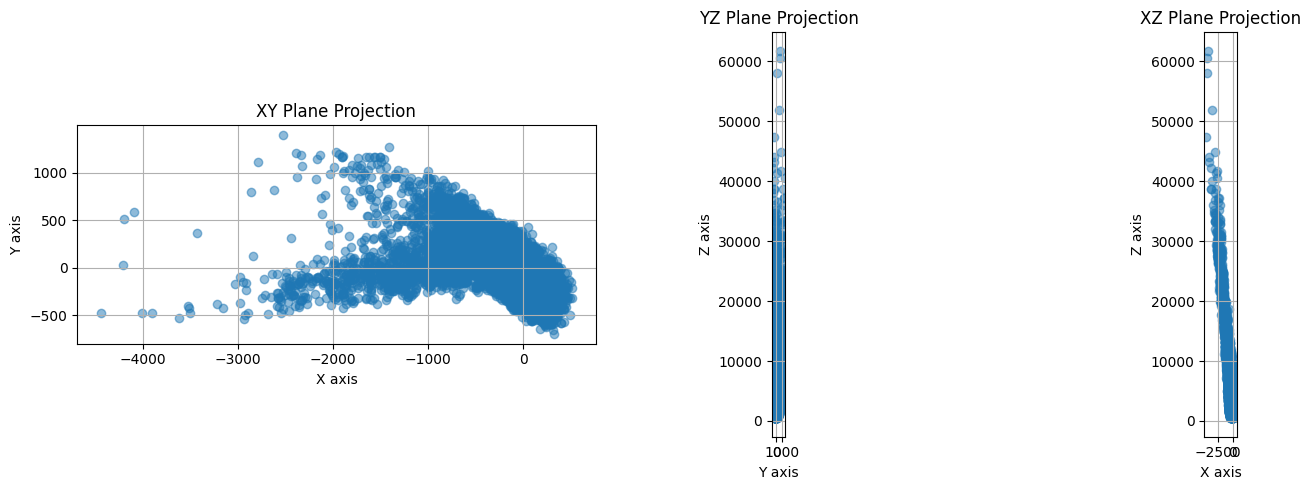

In [6]:
%matplotlib inline

def plot_3d_projections(root_delta):
    """
    绘制3D点在XY、YZ、XZ投影平面上的分布

    参数:
        root_delta: numpy数组, 形状为[N,3], 包含X,Y,Z坐标
    """
    # 创建图形和3D子图
    fig = plt.figure(figsize=(15, 5))

    # XY平面投影
    ax1 = fig.add_subplot(131)
    ax1.scatter(root_delta[:, 0], root_delta[:, 1], alpha=0.5)
    ax1.set_title('XY Plane Projection')
    ax1.set_xlabel('X axis')
    ax1.set_ylabel('Y axis')
    ax1.grid(True)
    ax1.set_aspect("equal")

    # YZ平面投影
    ax2 = fig.add_subplot(132)
    ax2.scatter(root_delta[:, 1], root_delta[:, 2], alpha=0.5)
    ax2.set_title('YZ Plane Projection')
    ax2.set_xlabel('Y axis')
    ax2.set_ylabel('Z axis')
    ax2.grid(True)
    ax2.set_aspect("equal")

    # XZ平面投影
    ax3 = fig.add_subplot(133)
    ax3.scatter(root_delta[:, 0], root_delta[:, 2], alpha=0.5)
    ax3.set_title('XZ Plane Projection')
    ax3.set_xlabel('X axis')
    ax3.set_ylabel('Z axis')
    ax3.grid(True)
    ax3.set_aspect("equal")

    plt.tight_layout()
    plt.show()

plt.clf()

root_gt = gt[:, 0]
root_pred = pred[:, 0]
root_delta = root_gt - root_pred

plot_3d_projections(root_delta)